In [11]:
import pandas as pd 
import numpy as np

import umap.umap_ as umap

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import sklearn.cluster as cluster
import distinctipy


In [32]:
user = pd.read_csv("../MIND_large/csv/user_features.csv", index_col=0)
user.head(2)

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,foodanddrink,lifestyle,sports,travel,weather,middleeast,kids,games,median
0,U1,0.444444,0.236111,0.111111,0.083333,0.097222,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333
1,U100,0.162791,0.046512,0.046512,0.046512,0.023256,0.000000,0.046512,0.069767,0.116279,0.116279,0.209302,0.116279,0.0,0.0,0.0,0.0,0.0,0.208333


In [4]:
from clustering_modules import create_UMAP_embeddings

/opt/conda/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [5]:
metrics = ['euclidean','cosine','hellinger']

In [8]:

embeddings = [create_UMAP_embeddings(2, user.iloc[:,1:], metric, 100, 0.1) for metric in metrics]
embeddings[1]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


array([[-3.6881034, -0.0199976],
       [ 0.8239037, -2.9377902],
       [-3.0628803, -0.7324859],
       ...,
       [ 0.6324535, -2.1861615],
       [ 0.4087948, -3.4558737],
       [-2.9850469,  0.7796208]], dtype=float32)

In [6]:
fname = "../MIND_large/csv/user_embeddings_"
for index, item in enumerate(metrics):
    print(index, item)
    np.save(fname + f'{item}.npy', embeddings[index])

0 euclidean


NameError: name 'embeddings' is not defined

In [7]:
kmeans_labels = [cluster.KMeans(n_clusters=10,n_init='auto').fit_predict(embedding) for embedding in embeddings]

NameError: name 'embeddings' is not defined

In [23]:
def plot_user_distance(embeddings, kmeans, distance_metric):
    cmap = matplotlib.colormaps['plasma']

    # Create the grid to put plots on.
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    # Flatten the axes for easier list indexing.
    axs = axs.flatten()

    # Unpack the labels from the lists.
    eu_km, cos_km, he_km = kmeans_labels
    
    # Create euclidean distance metric scatterplots assigned to the top row.
    axs[0].scatter(embeddings[0][:, 0],embeddings[0][:, 1], alpha = 0.5, s=1, c=eu_km, cmap=cmap)
    axs[1].scatter(embeddings[1][:, 0],embeddings[1][:, 1], alpha = 0.5, s=1, c=cos_km, cmap=cmap)
    axs[2].scatter(embeddings[2][:, 0],embeddings[2][:, 1], alpha = 0.5, s=1, c=he_km, cmap=cmap)
    axs[0].set_title(f'{distance_metric[0]}')
    axs[1].set_title(f'{distance_metric[1]}')
    axs[2].set_title(f'{distance_metric[2]}')

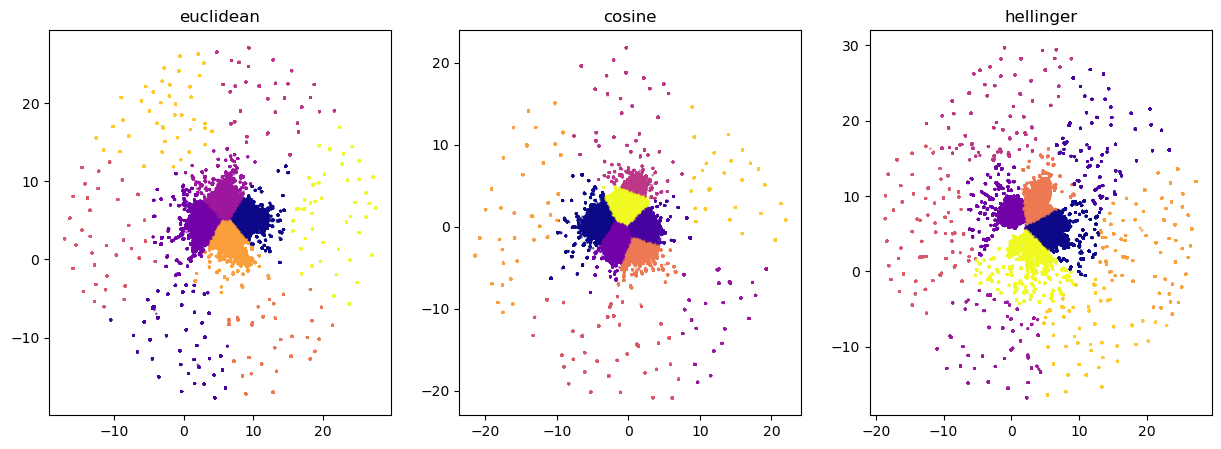

In [24]:
plot_user_distance(embeddings, kmeans_labels, metrics)

In [ ]:
fig, ax = plt.subplots(1,3)

In [8]:
metrics = ['euclidean','cosine']
parameters = [(0.0, 30),(0.1, 30),(0.0,50)]
embeddings = []
for metric in metrics:
    for p_comb in parameters:
        min_dist, n_neigh = p_comb
        embeddings.append(np.load(f'../MIND_large/csv/user_embeddings_{metric}_{min_dist}_{n_neigh}.npy'))
kmeans_labels = [cluster.KMeans(n_clusters=30,n_init='auto').fit_predict(embedding) for embedding in embeddings]

In [9]:
def plot_user_clusters_params(embeddings, kmeans, distance_metric, params):
    colors = distinctipy.get_colors(36)
    cmap = distinctipy.get_colormap(colors)

    # Create the grid to put plots on.
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
    
    # Flatten the axes for easier list indexing.
    axs = axs.flatten()

    # Unpack the labels from the lists.
    eu_bs_km, eu_min_km, eu_nn_km, cos_bs_km, cos_min_km, cos_nn_km = kmeans_labels
    
    # Create euclidean distance metric scatterplots assigned to the top row.
    axs[0].scatter(embeddings[0][:, 0],embeddings[0][:, 1], alpha = 0.5, s=1, c=eu_bs_km, cmap=cmap)
    axs[1].scatter(embeddings[1][:, 0],embeddings[1][:, 1], alpha = 0.5, s=1, c=eu_min_km, cmap=cmap)
    axs[2].scatter(embeddings[2][:, 0],embeddings[2][:, 1], alpha = 0.5, s=1, c=eu_nn_km, cmap=cmap)
    axs[0].set_title(f'{distance_metric[0]} - {" ".join(map(str, params[0]))}')
    axs[1].set_title(f'{distance_metric[0]} - {" ".join(map(str, params[1]))}')
    axs[2].set_title(f'{distance_metric[0]} - {" ".join(map(str, params[2]))}')

    axs[3].scatter(embeddings[3][:, 0],embeddings[3][:, 1], alpha = 0.5, s=1, c=cos_bs_km, cmap=cmap)
    axs[4].scatter(embeddings[4][:, 0],embeddings[4][:, 1], alpha = 0.5, s=1, c=cos_min_km, cmap=cmap)
    axs[5].scatter(embeddings[5][:, 0],embeddings[5][:, 1], alpha = 0.5, s=1, c=cos_nn_km, cmap=cmap)

    axs[3].set_title(f'{distance_metric[1]}-{" ".join(map(str, params[0]))}')
    axs[4].set_title(f'{distance_metric[1]}-{" ".join(map(str, params[1]))}')
    axs[5].set_title(f'{distance_metric[1]}-{" ".join(map(str, params[2]))}')

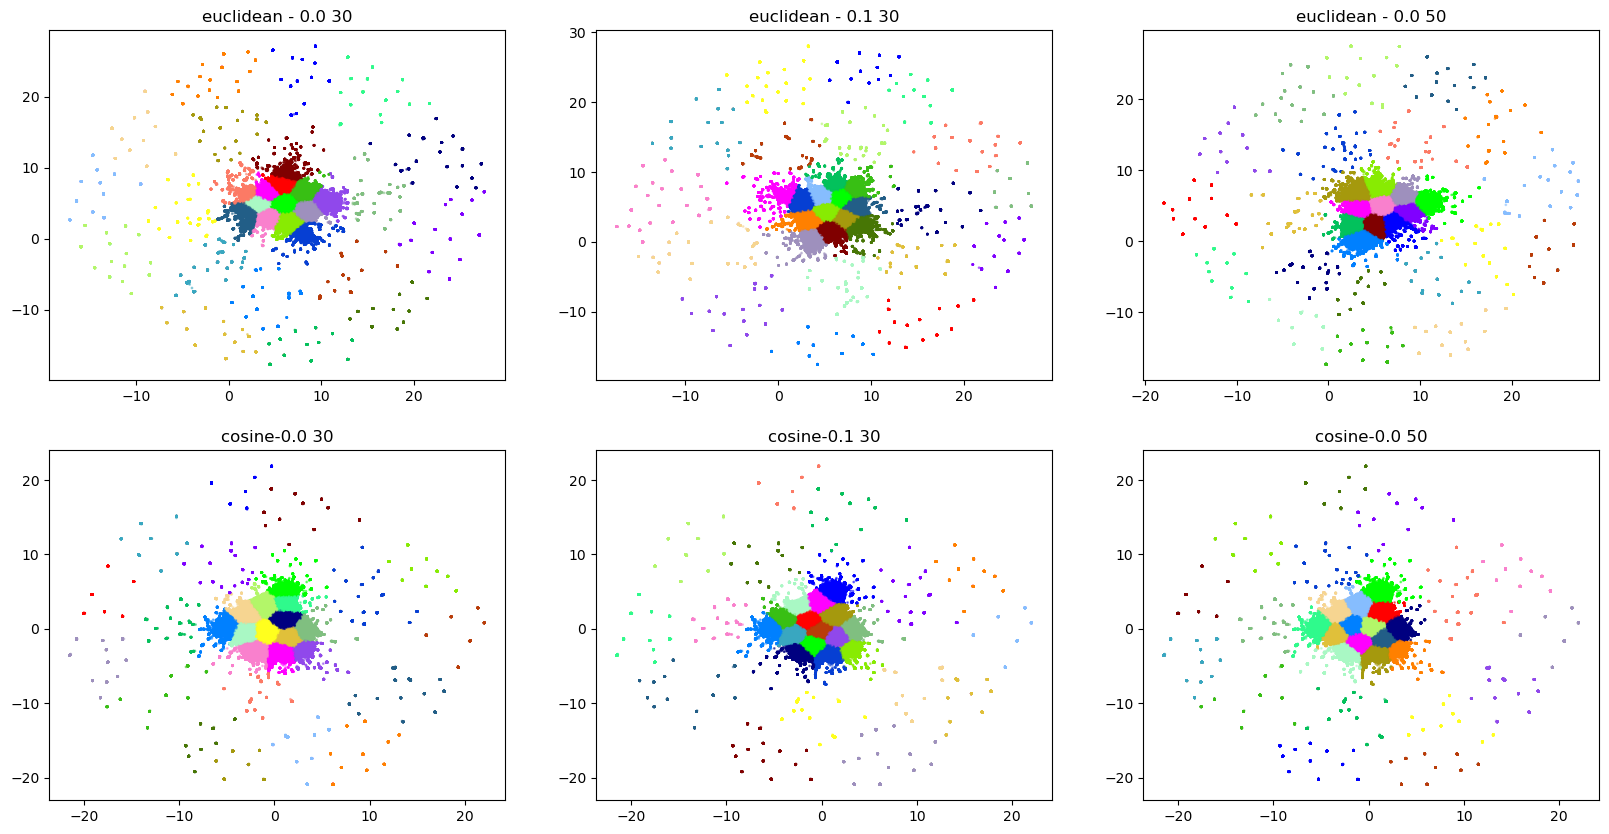

In [13]:
plot_user_clusters_params(embeddings, kmeans_labels, metrics, parameters)

In [33]:
user_copy = user.copy()

In [22]:
user_copy["labels"] = kmeans_labels[5]
user_copy["labels"].value_counts()
for i in range(30):
    print("Cluster Group " + str(i))
    print(user[user["labels"] == i].describe())

Cluster Group 0
               news  entertainment       finance         video            tv  \
count  20919.000000   20919.000000  20919.000000  20919.000000  20919.000000   
mean       0.134777       0.020195      0.045099      0.011042      0.055118   
std        0.110554       0.047889      0.066354      0.034122      0.072787   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.050847       0.000000      0.000000      0.000000      0.000000   
50%        0.133333       0.000000      0.000000      0.000000      0.024096   
75%        0.200000       0.016393      0.071429      0.000000      0.090909   
max        0.888889       0.500000      0.400000      0.333333      0.400000   

             movies         music         autos        health  foodanddrink  \
count  20919.000000  20919.000000  20919.000000  20919.000000  20919.000000   
mean       0.031486      0.019644      0.027894      0.027579      0.027344   
std        0.058275      0

<!-- We're still getting a lot of outliers for this method weirdly I think I will try to go back to clustering just based on the features of the user vectors, and then just use umap to visualize the clusters -->


In [19]:
epochs_umap = create_UMAP_embeddings(2, user.iloc[:,1:], metric="cosine", min_dist=0.0, n_neighors=50,n_epochs=200)
km_epochs = cluster.KMeans(n_clusters=30,n_init='auto').fit_predict(epochs_umap)

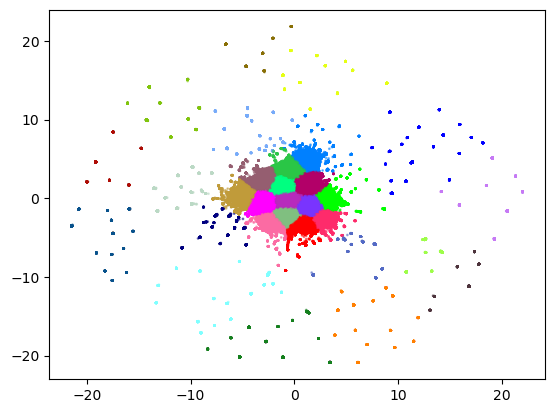

In [20]:
colors = distinctipy.get_colors(50)
cmap = distinctipy.get_colormap(colors)
plt.scatter(epochs_umap[:, 0],epochs_umap[:, 1], alpha = 0.5, c=km_epochs, cmap = cmap,s=1)

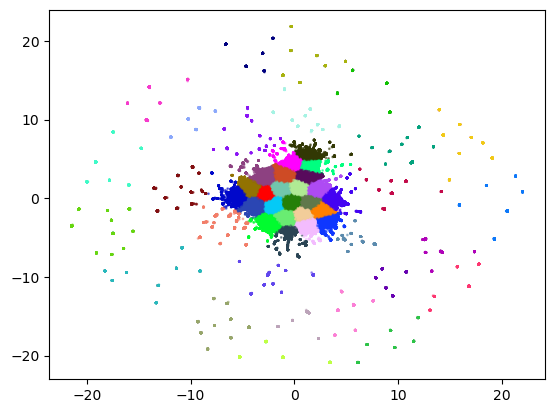

In [47]:
colors = distinctipy.get_colors(50)
cmap = distinctipy.get_colormap(colors)
km_epochs = cluster.KMeans(n_clusters=50,n_init='auto').fit_predict(epochs_umap)
plt.scatter(epochs_umap[:, 0],epochs_umap[:, 1], alpha = 0.5, c=km_epochs, cmap = cmap,s=1)

In [48]:
user_copy["label"] = km_epochs
user_copy[user_copy["label"]==2].head()

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,...,lifestyle,sports,travel,weather,middleeast,kids,games,median,label,umap2_cluster
11,U10004,0.197183,0.211268,0.0000,0.014085,0.211268,0.098592,0.098592,0.0,0.028169,...,0.084507,0.014085,0.028169,0.0,0.0,0.0,0.0,0.250000,2,43
43,U100145,0.000000,0.750000,0.0000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.708333,2,32
73,U100253,0.000000,0.300000,0.0000,0.000000,0.100000,0.200000,0.100000,0.0,0.000000,...,0.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.291667,2,32
77,U100262,0.000000,0.000000,0.0000,0.000000,0.428571,0.000000,0.285714,0.0,0.000000,...,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.291667,2,7
134,U100428,0.125000,0.000000,0.0625,0.000000,0.500000,0.062500,0.125000,0.0,0.062500,...,0.062500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,2,7


In [67]:
user_copy = user.copy()
user_copy["label"] = km_epochs

user_copy[user_copy["label"]==29].head()

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,foodanddrink,lifestyle,sports,travel,weather,middleeast,kids,games,median,label
5,U100014,0.350000,0.000000,0.000000,0.000000,0.100000,0.050000,0.0,0.000000,0.150000,0.200000,0.050000,0.050000,0.050000,0.000000,0.0,0.0,0.0,0.333333,29
27,U100084,0.391304,0.000000,0.130435,0.000000,0.065217,0.021739,0.0,0.000000,0.086957,0.065217,0.108696,0.043478,0.086957,0.000000,0.0,0.0,0.0,0.500000,29
41,U10014,0.583333,0.041667,0.125000,0.000000,0.000000,0.000000,0.0,0.125000,0.000000,0.000000,0.041667,0.000000,0.041667,0.041667,0.0,0.0,0.0,0.833333,29
68,U100234,0.382353,0.029412,0.264706,0.029412,0.029412,0.029412,0.0,0.147059,0.000000,0.000000,0.029412,0.000000,0.058824,0.000000,0.0,0.0,0.0,0.583333,29
69,U10024,0.400000,0.000000,0.000000,0.000000,0.200000,0.200000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.0,0.0,0.416667,29


In [53]:
user_copy["label"].value_counts()

label
7     12526
29    12422
22    11642
37    11526
2     11461
19    11419
9     11050
46    10704
35    10470
33    10380
0     10278
32    10038
18     9989
45     9973
38     9778
23     9096
30     8908
10     8263
39     8238
44     8106
1      8006
4      7920
20     6595
21     2792
27     1351
15     1001
47      921
17      825
41      775
34      763
24      758
3       743
5       739
28      702
26      675
12      671
42      666
14      660
6       635
43      617
48      616
49      576
40      551
16      526
11      525
8       520
25      461
36      410
13      377
31      329
Name: count, dtype: int64

In [ ]:
user["labels"] = km_epochs
user["labels"].value_counts()
# Okay it seems like a massive change in how the clustering worked just by changing the parameter of n_neighbors so this is just to test if it really is just changing due to setting the n_neighbors to 50 and having 200 epochs.

In [37]:
user_added_values = user_copy.copy()
user_added_values["umap_x"] = epochs_umap[:, 0]
user_added_values["umap_y"] = epochs_umap[:, 1]
user_added_values

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,...,sports,travel,weather,middleeast,kids,games,median,label,umap_x,umap_y
0,U1,0.444444,0.236111,0.111111,0.083333,0.097222,0.013889,0.013889,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.333333,1,-3.688103,-0.019998
1,U100,0.162791,0.046512,0.046512,0.046512,0.023256,0.000000,0.046512,0.069767,0.116279,...,0.116279,0.000000,0.000000,0.0,0.0,0.0,0.208333,26,0.823904,-2.937790
2,U1000,0.444444,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.333333,1,-3.062880,-0.732486
3,U10000,0.091954,0.022989,0.137931,0.034483,0.045977,0.022989,0.022989,0.011494,0.114943,...,0.057471,0.022989,0.000000,0.0,0.0,0.0,0.500000,0,3.298264,-0.259717
4,U100005,0.354839,0.000000,0.043011,0.010753,0.032258,0.043011,0.000000,0.000000,0.021505,...,0.150538,0.000000,0.032258,0.0,0.0,0.0,0.583333,9,-0.295320,0.867603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248968,U99984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.416667,28,-0.927892,-4.165997
248969,U99989,0.400000,0.000000,0.133333,0.000000,0.000000,0.133333,0.000000,0.000000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.0,0.0,0.291667,1,-3.085576,-0.723006
248970,U99993,0.192308,0.000000,0.076923,0.000000,0.000000,0.076923,0.038462,0.000000,0.038462,...,0.153846,0.038462,0.000000,0.0,0.0,0.0,0.375000,4,0.632454,-2.186162
248971,U99994,0.333333,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.291667,26,0.408795,-3.455874


In [38]:
epochs_umap_test = create_UMAP_embeddings(2, user_added_values.iloc[:,1:], metric="cosine", min_dist=0.0, n_neighors=50,n_epochs=200)


In [43]:
km_epochs_test = cluster.KMeans(n_clusters=50,n_init='auto').fit_predict(epochs_umap_test)

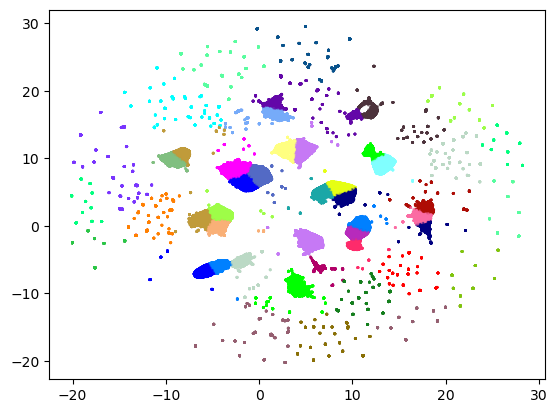

In [44]:
plt.scatter(epochs_umap_test[:, 0],epochs_umap_test[:, 1], alpha = 0.5, c=km_epochs_test, cmap = cmap,s=1)

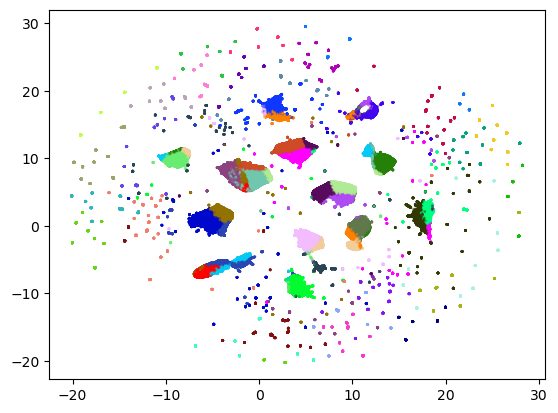

In [49]:
plt.scatter(epochs_umap_test[:, 0],epochs_umap_test[:, 1], alpha = 0.5, c=km_epochs, cmap = cmap,s=1)

In [51]:
user_copy["umap2_cluster"].value_counts()

umap2_cluster
11    14501
0     11189
24    10499
2      9458
12     9377
18     9358
19     8630
37     8435
30     8387
4      7853
1      7731
40     7713
43     7625
6      7409
3      7162
9      7068
32     7016
28     6990
49     6720
8      6679
10     6603
17     6573
47     6527
46     6508
35     6507
21     5803
33     5647
45     5349
34     4324
7      3841
14     1956
20     1916
39     1886
41     1543
5      1521
23     1483
13     1332
38     1228
29     1097
27     1029
44     1005
26      904
48      702
31      691
22      684
36      534
16      524
25      502
15      494
42      460
Name: count, dtype: int64

In [65]:
user_copy["umap2_cluster"] = km_epochs_test
user_copy[user_copy["umap2_cluster"]==2].head() 

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,...,lifestyle,sports,travel,weather,middleeast,kids,games,median,label,umap2_cluster
23,U100080,0.400000,0.00,0.200000,0.025000,0.000000,0.000000,0.00,0.000000,0.025,...,0.025000,0.22500,0.0,0.075,0.0,0.0,0.0,0.416667,32,2
32,U100108,0.320000,0.00,0.040000,0.020000,0.060000,0.100000,0.02,0.040000,0.020,...,0.080000,0.24000,0.0,0.000,0.0,0.0,0.0,0.208333,4,2
60,U100195,0.350000,0.05,0.000000,0.000000,0.100000,0.100000,0.05,0.000000,0.050,...,0.000000,0.25000,0.0,0.050,0.0,0.0,0.0,0.250000,4,2
72,U100252,0.416667,0.00,0.166667,0.000000,0.083333,0.000000,0.00,0.000000,0.000,...,0.000000,0.25000,0.0,0.000,0.0,0.0,0.0,0.500000,32,2
80,U100271,0.435897,0.00,0.076923,0.025641,0.076923,0.051282,0.00,0.025641,0.000,...,0.051282,0.25641,0.0,0.000,0.0,0.0,0.0,0.458333,45,2


In [56]:
user_copy[user_copy["umap2_cluster"]== 11].iloc[:,6:].head() 

,movies,music,autos,health,foodanddrink,lifestyle,sports,travel,weather,middleeast,kids,games,median,label,umap2_cluster
1,0.000000,0.046512,0.069767,0.116279,0.116279,0.209302,0.116279,0.000000,0.000000,0.0,0.0,0.0,0.208333,37,11
6,0.037037,0.000000,0.000000,0.037037,0.111111,0.259259,0.074074,0.074074,0.000000,0.0,0.0,0.0,0.166667,37,11
24,0.000000,0.000000,0.000000,0.000000,0.312500,0.312500,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.250000,37,11
35,0.067568,0.067568,0.000000,0.148649,0.013514,0.202703,0.148649,0.013514,0.013514,0.0,0.0,0.0,0.250000,19,11
36,0.000000,0.125000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.500000,37,11


In [23]:
user_copy["umap_x"] = epochs_umap[:, 0]
user_copy["umap_y"] = epochs_umap[:, 1]

In [28]:
user_copy["final_cluster"] = km_epochs_test
user_copy[user_copy["final_cluster"] == 0].head()

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,...,travel,weather,middleeast,kids,games,median,labels,umap_x,umap_y,final_cluster
67,U100232,0.714286,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.500000,22,-4.001384,0.789051,0
96,U100311,0.471698,0.012579,0.056604,0.006289,0.088050,0.062893,0.025157,0.006289,0.012579,...,0.012579,0.0,0.0,0.0,0.0,0.166667,22,-4.569116,-0.346673,0
103,U100332,0.750000,0.000000,0.156250,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.458333,22,-4.688016,0.789485,0
121,U100397,0.412698,0.142857,0.079365,0.015873,0.031746,0.000000,0.031746,0.063492,0.000000,...,0.015873,0.0,0.0,0.0,0.0,0.125000,22,-4.714476,-0.209634,0
122,U1004,0.500000,0.060606,0.090909,0.030303,0.060606,0.075758,0.000000,0.000000,0.000000,...,0.015152,0.0,0.0,0.0,0.0,0.208333,22,-4.795939,0.957402,0


In [ ]:
epochs_umap = create_UMAP_embeddings(2, user_copy.iloc[:,1:], metric="cosine", min_dist=0.0, n_neighors=50,n_epochs=200)
km_epochs = cluster.KMeans(n_clusters=30,n_init='auto').fit_predict(epochs_umap)

In [ ]:
query = "((umap_x > 10) or (umap_x < -10)) & ((umap_y > 10) or (umap_y < -10))"
outliers = user.query(query)
outliers
outliers.to_csv("../MIND_large/csv/outliers_users.csv")